In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
data = pd.read_csv("Outliers_removed.csv")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
import xgboost as xgb

C:\Users\bchou\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = data.drop(data.columns[[0,1]],axis=1)

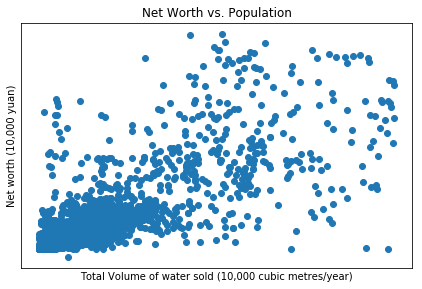

In [4]:
plt.ylabel('Net worth (10,000 yuan)')
plt.xlabel("Total Volume of water sold (10,000 cubic metres/year)")
plt.title('Net Worth vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(data["3.1. Total Volume of water sold (10,000 cubic metres/year)"],data['20.2. Net worth (10,000 yuan)'])


In [5]:
print("Less water, lower net worth")

Less water, lower net worth


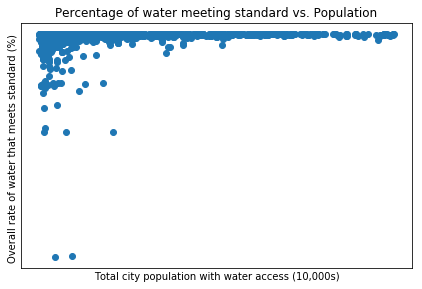

In [6]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel('Total city population with water access (10,000s)')
plt.title('Percentage of water meeting standard vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(data['5.3. Total city population with water access (10,000s)'],data["14.1. Overall rate of water that meets standard (%)"])


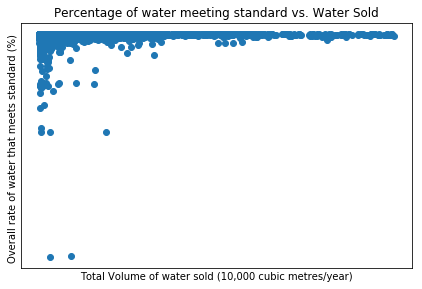

In [7]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel("Total Volume of water sold (10,000 cubic metres/year)")
plt.title('Percentage of water meeting standard vs. Water Sold')
plt.xticks(())
plt.yticks(())
plt.scatter(data["3.1. Total Volume of water sold (10,000 cubic metres/year)"],data["14.1. Overall rate of water that meets standard (%)"])


In [8]:
print("Less acceptable water for cities with less population and water sold")

Less acceptable water for cities with less population and water sold


In [9]:
df1 = pd.DataFrame.copy(data)
df2 = pd.DataFrame.copy(data)
df1 = shuffle(df1)
df2 = shuffle(df2)
features = df1.describe()

# imputation by subbing with mean on copy of data
for i in list(df1):
    if(i != 'Province' and i != 'Year'):
        df1[i] = df1[i].fillna(features[i].loc["mean"])
        df2[i] = df2[i].fillna(features[i].loc["mean"])

        

In [10]:
print("without categorization\n")
X = df1
X = X.drop('Province', axis = 1)
Y = df1['Province']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print("logistic regression training accuracy: ",logreg.score(X_train,Y_train))
print("logistic regression testing accuracy: ",logreg.score(X_test,Y_test) )

svc = SVC()
svc.fit(X_train, Y_train)
print("SVM training accuracy: ",svc.score(X_train, Y_train))
print("SVM testing accuracy: ",svc.score(X_test,Y_test) )

perceptron = Perceptron(max_iter = 1000, tol = None)
perceptron.fit(X_train, Y_train)
print("Perceptron training accuracy: ",perceptron.score(X_train, Y_train))
print("Perceptron testing accuracy: ",perceptron.score(X_test,Y_test) )

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print("KNN training accuracy: ",knn.score(X_train, Y_train))
print("KNN testing accuracy: ",knn.score(X_test,Y_test) )

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest.score(X_test,Y_test) )

gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, Y_train)
Y_pred = gradboost.predict(X_test)
acc_perceptron = round(gradboost.score(X_train, Y_train) * 100, 2)
print("xgboost training accuracy: ",round(gradboost.score(X_train, Y_train) * 100, 2))
print("xgboost testing accuracy: ",round(gradboost.score(X_test, Y_test) * 100, 2))

without categorization

logistic regression training accuracy:  0.26532646619
logistic regression testing accuracy:  0.240531561462
SVM training accuracy:  0.833361023426
SVM testing accuracy:  0.106312292359
Perceptron training accuracy:  0.0621365675361
Perceptron testing accuracy:  0.0591362126246
KNN training accuracy:  0.470842332613
KNN testing accuracy:  0.241860465116
random forest training accuracy:  0.837348396744
random forest testing accuracy:  0.726245847176
xgboost training accuracy:  83.73
xgboost testing accuracy:  74.88


In [24]:
# categorize all columns except for province and year

for i in list(df2):
    if(i != 'Province' and i != 'Year'):
        buckets = [str(i) for i in range(10)]
        classes = pd.cut(df2[i],10,labels=buckets)
        df2[i]  = classes.map({'0': 0, '1':1,'2': 2,'3':3,'4' :4,'5' :5,'6' :6,'7' :7,'8' :8,'9' :9,})


In [25]:
print("with categorization\n")
X2 = df2
X2 = X2.drop('Province', axis =1)
Y2 = df2['Province']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20)

logreg2 = LogisticRegression()
logreg2.fit(X2_train, Y2_train)
print("logisitic regression training accuracy: ",logreg.score(X2_train,Y2_train))
print("logisitic regression testing accuracy: ",logreg.score(X2_test,Y2_test) )

svc2 = SVC()
svc2.fit(X2_train, Y2_train)
print("SVM training accuracy: ",svc.score(X2_train, Y2_train))
print("SVM testing accuracy: ",svc.score(X2_test,Y2_test) )

perceptron2 = Perceptron(max_iter = 2000, tol = None)
perceptron2.fit(X2_train, Y2_train)
print("Perceptron training accuracy: ",perceptron.score(X2_train, Y2_train))
print("Perceptron testing accuracy: ",perceptron.score(X2_test,Y2_test) )

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X2_train, Y2_train)
print("KNN training accuracy: ",knn.score(X2_train, Y2_train))
print("KNN testing accuracy: ",knn.score(X2_test,Y2_test) )

random_forest2 = RandomForestClassifier(n_estimators=1000)
random_forest2.fit(X2_train, Y2_train)
print("random forest training accuracy: ",random_forest.score(X2_train, Y2_train))
print("random forest testing accuracy: ",random_forest.score(X2_test,Y2_test) )

gradboost2 = xgb.XGBClassifier(n_estimators=1000)
gradboost2.fit(X2_train, Y2_train)
Y_pred2 = gradboost.predict(X2_test)
print("xgboost training accuracy: ",round(gradboost.score(X2_train, Y2_train) * 100, 2))
print("xgboost testing accuracy: ",round(gradboost.score(X2_test, Y2_test) * 100, 2))

with categorization

logisitic regression training accuracy:  0.0589798969929
logisitic regression testing accuracy:  0.0671096345515
SVM training accuracy:  0.0790829041369
SVM testing accuracy:  0.0744186046512
Perceptron training accuracy:  0.0589798969929
Perceptron testing accuracy:  0.0671096345515
KNN training accuracy:  0.0438611064961
KNN testing accuracy:  0.0398671096346
random forest training accuracy:  0.0932048513042
random forest testing accuracy:  0.0823920265781
xgboost training accuracy:  5.85
xgboost testing accuracy:  5.91


In [14]:
print("df1 (without categorizing) xgboost holds the greatest accuracy")

df1 (without categorizing) xgboost holds the greatest accuracy


In [19]:
def plot_model_var_imp( model , X , Y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[:10].plot( kind = 'barh' )
    print (model.score( X , Y ))

importances for xgboost
0.837348396744


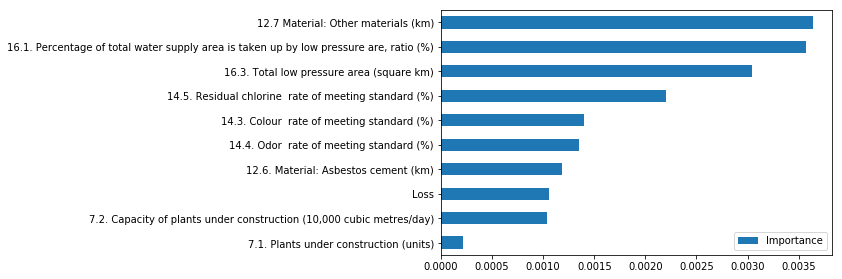

In [27]:
print("importances for xgboost")
plot_model_var_imp(gradboost, X_train, Y_train)

importances for random forest
0.837348396744


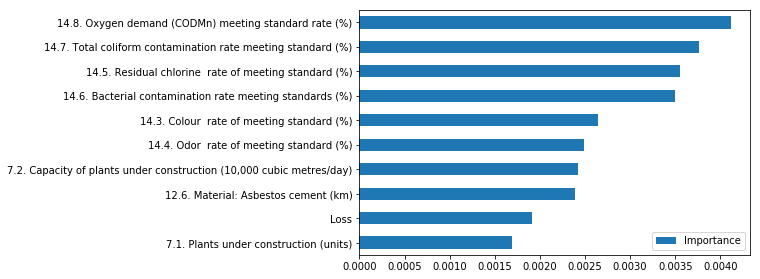

In [26]:
print("importances for random forest")
plot_model_var_imp(random_forest, X_train, Y_train)


In [23]:
print("tune random forest and xgboost using GridSearchCV")


tune random forest and xgboost using GridSearchCV


In [28]:
print("training final classifier: tuned xgboost without categorization")


training final classifier: tuned xgboost without categorization


In [16]:
print("use feature scaling on train/test for logreg")


use feature scaling on train/test for logreg


In [17]:
print("using regularization within logreg")

using regularization within logreg


In [18]:
print("try clustering for visualzation. Try simple decision tree and stochastic gradient descent")

try clustering for visualzation. Try simple decision tree and stochastic gradient descent
